# Projet IA

Dans ce notebook, nous allons essayer de voir le lien entre la concomation energetiques de  population d'une région et ces effets sur la temperature et le cliamt de cette région

On commence par importer les different librairies avec lesquelles nous allons traivaller

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import statsmodels
import statistics
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from pandas_profiling import ProfileReport
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold

In [3]:
data = pd.read_csv('C:/Users/karel/OneDrive/Documents/Meine Unterlagen/Skool/Cour/Semestre2/Projet_IA/n/HomeC.csv', low_memory=False)

### Exploration et Netoyage des Données

In [4]:
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

Nous constatons qu'il y'a certianes colonnes qui ne sont pas très informatives a notre gout, donc nous allons extraire les colonnes que nous allons utiliser pour notre analyse

In [6]:
col_utile = ['use [kW]' ,'gen [kW]', 'House overall [kW]', 'Solar [kW]' , 'temperature', 'icon', 'summary', 'apparentTemperature']
d = data[col_utile]
print(d.head())
print(d.shape)

   use [kW]  gen [kW]  House overall [kW]  Solar [kW]  temperature  \
0  0.932833  0.003483            0.932833    0.003483        36.14   
1  0.934333  0.003467            0.934333    0.003467        36.14   
2  0.931817  0.003467            0.931817    0.003467        36.14   
3  1.022050  0.003483            1.022050    0.003483        36.14   
4  1.139400  0.003467            1.139400    0.003467        36.14   

          icon summary  apparentTemperature  
0  clear-night   Clear                29.26  
1  clear-night   Clear                29.26  
2  clear-night   Clear                29.26  
3  clear-night   Clear                29.26  
4  clear-night   Clear                29.26  
(503911, 8)


####  Traitement des donné manquante

In [7]:
d.isnull().sum()

use [kW]               1
gen [kW]               1
House overall [kW]     1
Solar [kW]             1
temperature            1
icon                   1
summary                1
apparentTemperature    1
dtype: int64

Vu que la nombre de données manquantes est pratiquement insignifiant, nous allons suprimmer ces colones

In [8]:
d1 = d.dropna()

In [76]:
# Verifions que nous avons plus de données manquante
d1.isnull().sum()

use [kW]               0
gen [kW]               0
House overall [kW]     0
Solar [kW]             0
temperature            0
icon                   0
summary                0
apparentTemperature    0
dtype: int64

Nous pouvons constater qu'il n'y a plus de données manquante. 

####  Traitement des doublons

In [12]:
d1.duplicated().sum()

624

Nous confirmons la presence des la valeurs manquantes

In [13]:
d1.duplicated().value_counts()

False    503286
True        624
dtype: int64

In [14]:
(d1.duplicated().sum()/len(d1))*100

0.12383163660177413

Nous remarquons que le pourcentage de doublons est negligeable paraport a la taille complete des données, donc nous allons 
suprimer tous les doublons

In [15]:
d_clean = d1.drop_duplicates()

In [16]:
d_clean.shape

(503286, 8)

In [17]:
# Nous voulons nous rassurer que les doublons ont bien était retiter de notre base de données
503910 - 624

503286

Nous avons traiter les données manquante et les doublons. 
Maintenant nous pouvons faire des analyses sur notre base de données netoyer

In [18]:
d_clean.head()

,use [kW],gen [kW],House overall [kW],Solar [kW],temperature,icon,summary,apparentTemperature
0,0.932833,0.003483,0.932833,0.003483,36.14,clear-night,Clear,29.26
1,0.934333,0.003467,0.934333,0.003467,36.14,clear-night,Clear,29.26
2,0.931817,0.003467,0.931817,0.003467,36.14,clear-night,Clear,29.26
3,1.022050,0.003483,1.022050,0.003483,36.14,clear-night,Clear,29.26
4,1.139400,0.003467,1.139400,0.003467,36.14,clear-night,Clear,29.26


In [19]:
# Renomons les colonens 
d_clean = d_clean.rename(columns={"use [kW]" : "total_energy_cons", "gen [kW]" : "total_energy_gen", 
        "House overall [kW]" : 'house_overall_energy_cons', 'Solar [kW]' : 'solar_power_gen', 'icon' : 'overall_weather_cond' ,
         "summary" : "summarise_weather" })

In [20]:
d_clean.head()

,total_energy_cons,total_energy_gen,house_overall_energy_cons,solar_power_gen,temperature,overall_weather_cond,summarise_weather,apparentTemperature
0,0.932833,0.003483,0.932833,0.003483,36.14,clear-night,Clear,29.26
1,0.934333,0.003467,0.934333,0.003467,36.14,clear-night,Clear,29.26
2,0.931817,0.003467,0.931817,0.003467,36.14,clear-night,Clear,29.26
3,1.022050,0.003483,1.022050,0.003483,36.14,clear-night,Clear,29.26
4,1.139400,0.003467,1.139400,0.003467,36.14,clear-night,Clear,29.26


Nous allons créer un matrix de corrélation pour éssayer de mieux comprende le lien entre les variable quantitatives

In [21]:
d_clean.corr()

,total_energy_cons,total_energy_gen,house_overall_energy_cons,solar_power_gen,temperature,apparentTemperature
total_energy_cons,1.000000,-0.132034,1.000000,-0.132034,0.010412,0.005617
total_energy_gen,-0.132034,1.000000,-0.132034,1.000000,0.091063,0.093895
house_overall_energy_cons,1.000000,-0.132034,1.000000,-0.132034,0.010412,0.005617
solar_power_gen,-0.132034,1.000000,-0.132034,1.000000,0.091063,0.093895
temperature,0.010412,0.091063,0.010412,0.091063,1.000000,0.993186
apparentTemperature,0.005617,0.093895,0.005617,0.093895,0.993186,1.000000


<AxesSubplot:>

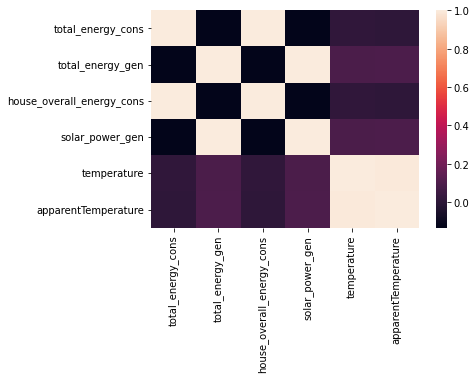

In [23]:
sns.heatmap(d_clean.corr())

Nous constatons qu'il y'a une correaltion negative entre l'énergie générer et celle produite consommer. 
Nous constaton aussi la correation(lien) positive entre la temperature et l'énergie. Que sa soit l'énergie produite ou consomer

In [26]:
d_clean.columns

Index(['total_energy_cons', 'total_energy_gen', 'house_overall_energy_cons',
       'solar_power_gen', 'temperature', 'overall_weather_cond',
       'summarise_weather', 'apparentTemperature'],
      dtype='object')

In [27]:
# On renome les colonnes pour faciliter le traitement des celle si
d_m = d_clean.rename(columns={"use [kW]" : "total_energy_cons", "gen [kW]" : "total_energy_gen", 
        "House overall [kW]" : 'house_overall_energy_cons', 'Solar [kW]' : 'solar_power_gen', 'icon' : 'overall_weather_cond' ,
         "summary" : "summarise_weather" })

In [28]:
d_m.overall_weather_cond.value_counts()

clear-night            194311
clear-day              181980
rain                    43045
partly-cloudy-day       39451
partly-cloudy-night     27294
snow                     7544
cloudy                   6032
wind                     2656
fog                       973
Name: overall_weather_cond, dtype: int64

## Prediction des Temperature et du Temps
Nous allons faire usage de l'algorithme d'arbres decisionnelles et l'algorithme du plus proche voisin pour faire ses predictions

### Prediction du Temp(overall_weather_cond)

Nous allons utilsier les énergies consommer et produite pour prédire le temps qu'il fera. 
Pour se faire , nous allons ituilser de algorithme different:
- Un arbre decision pour la classification
- l'algorithme  du plus proche voisin

In [29]:
# On remplace les valeurs des la colonnes de overall_weather_cond par des valeurs numeriques pour pourvoir faire du 
# machine learning 
d_m['overall_weather_cond'].replace(['clear-night', 'clear-day','rain', 'partly-cloudy-day','partly-cloudy-night' ,'snow', 
'cloudy', 'wind', 'fog' ], [1,2,3,4,5,6,7,8,9], inplace=True)
d_m.head()

,total_energy_cons,total_energy_gen,house_overall_energy_cons,solar_power_gen,temperature,overall_weather_cond,summarise_weather,apparentTemperature
0,0.932833,0.003483,0.932833,0.003483,36.14,1,Clear,29.26
1,0.934333,0.003467,0.934333,0.003467,36.14,1,Clear,29.26
2,0.931817,0.003467,0.931817,0.003467,36.14,1,Clear,29.26
3,1.022050,0.003483,1.022050,0.003483,36.14,1,Clear,29.26
4,1.139400,0.003467,1.139400,0.003467,36.14,1,Clear,29.26


#### 1. Les K Plus Proche Voisins

In [30]:
# On definir nos variables X et y qui seront utiliser pour faire la prediction du temps
y = d_m['overall_weather_cond']
X = d_m.drop(['overall_weather_cond', 'summarise_weather', 'temperature'], axis=1)

In [31]:
# On divise nos données en deux ensembles
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [32]:
X_train.shape

(402628, 5)

In [33]:
X_test.shape

(100658, 5)

In [36]:
# On creer notre model
model_w = KNeighborsClassifier(n_neighbors=5)

In [39]:
# On creer nos données de validation(X_v, y_v pour valider notre model)
X_t, X_v, y_t, y_v = train_test_split(X_train,y_train, test_size=0.2, random_state=20)

In [40]:
# On entrain le model sur les données d'entrainement(X_t et y_t)
model_w.fit(X_t, y_t)

KNeighborsClassifier()

In [41]:
# On evalue le model nos données de validation(X_v,y_v)
model_w.score(X_v,y_v)

0.8344013113776917

In [42]:
# On évalue notre model pour différent valeur de k 
for k in [5,10,15,20,100,200]:
    model_score = KNeighborsClassifier(n_neighbors=k).fit(X_t,y_t).score(X_v,y_v)
    #mr = model_result.append(model_score)
    result = {k:model_score}
    print(result)

{5: 0.8344013113776917}
{10: 0.7876834811116906}
{15: 0.7531480515609865}
{20: 0.7214067506147083}
{100: 0.5665499341827485}
{200: 0.5326850954971065}


Nous constatons que nous avons le meilleur score pour k = 5

In [44]:
# On evalue notre model
model_w.score(X_test,y_test)

0.8359295833416122

In [71]:
# On visualise les predicton en itulisant la matrix de prediction
pred_dkn = model_w.predict(X_test)
confusion_matrix(y_test,pred_dkn)

array([[34270,  3002,   564,   457,   447,   168,   109,    26,    26],
       [ 3571, 31003,   596,   564,   339,    91,    72,    24,    19],
       [  887,   772,  6585,   130,    92,     7,    18,     6,     7],
       [  744,   852,   189,  6068,    73,     7,    11,     1,     0],
       [  789,   491,   133,    96,  3890,    17,    15,     3,     1],
       [  308,   147,    13,    14,    30,   982,     1,     0,     0],
       [  165,   120,    44,    26,    21,     6,   820,     0,     4],
       [   51,    52,    12,     5,     7,     0,     0,   422,     0],
       [   40,    14,     7,     0,     9,     0,     3,     0,   103]],
      dtype=int64)

#### 2. DecisionTreeClassifier

In [78]:
#model_result = []
for k in [5,10,15,20,50,100,200,500,750,1000, 2000, 3000, 4000, 5000, 10000]:
    model_score = DecisionTreeClassifier(max_leaf_nodes=k, random_state=20).fit(X_t,y_t).score(X_v,y_v)
    #mr = model_result.append(model_score)
    result = {k:model_score}
    print(result)

{5: 0.47303976355462835}
{10: 0.47303976355462835}
{15: 0.47958423366366143}
{20: 0.4854084395102203}
{50: 0.4946352730795023}
{100: 0.5058614608946179}
{200: 0.524998137247597}
{500: 0.5642277028537367}
{750: 0.5889898914636267}
{1000: 0.6141370489034598}
{2000: 0.6906092442192584}
{3000: 0.7509872587735639}
{4000: 0.7956312246976132}
{5000: 0.8312222139433226}
{10000: 0.9178774557285846}


Nous obtenons notre meilleur model pour une valeur de k =10000
Nous allons appliquer ce model sur nos données test

In [46]:
mod_w = DecisionTreeClassifier(max_leaf_nodes=10000, random_state=20)
mod_w.fit(X_t,y_t)

DecisionTreeClassifier(max_leaf_nodes=10000, random_state=20)

In [47]:
mod_w.score(X_test,y_test)

0.9206819130123786

Nous avons une precision de 92% ce qui est un bon score

In [69]:
# ON visualise nos prédictons
pred_dtc = mod_w.predict(X_test)
confusion_matrix(y_test,pred_dtc)

array([[36760,  1525,   326,   189,   176,    40,    32,    19,     2],
       [ 1688, 33847,   283,   232,   159,    24,    32,    11,     3],
       [  589,   433,  7326,    68,    67,     5,    14,     0,     2],
       [  353,   492,    84,  6968,    41,     1,     3,     3,     0],
       [  387,   227,    47,    31,  4735,     2,     3,     3,     0],
       [   95,    34,     1,     0,     4,  1361,     0,     0,     0],
       [   73,    49,    19,     2,    13,     0,  1049,     0,     1],
       [   39,    25,     4,     0,     0,     0,     0,   481,     0],
       [    9,     6,     6,     4,     3,     0,     1,     0,   147]],
      dtype=int64)

Nous constatons que les models de l'arbre dicisionnelles est un meilleur estimateur que celui du plus proche voisin

### Prediction du Temperature(temperature)
#### 2 DecisionTreeRegressor

In [48]:
d_clean.columns

Index(['total_energy_cons', 'total_energy_gen', 'house_overall_energy_cons',
       'solar_power_gen', 'temperature', 'overall_weather_cond',
       'summarise_weather', 'apparentTemperature'],
      dtype='object')

In [49]:
y1 = d_m['temperature']
X1 = d_m.drop(['overall_weather_cond', 'summarise_weather', 'temperature' ], axis=1)

On divise nos données en données test, données dentrainement et données de validation du model de regression

In [50]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=20)

In [51]:
# On crée les données de validation
X1_t, X1_v, y1_t, y1_v = train_test_split(X1_train,y1_train, test_size=0.2, random_state=20)

In [52]:
for k in [5,10,15,20,50,100,200,500,750,1000, 2000, 3000, 4000, 5000, 10000]:
    model_score = DecisionTreeRegressor(max_leaf_nodes=k, random_state=20).fit(X1_t,y1_t).score(X1_v,y1_v)
    #mr = model_result.append(model_score)
    result = {k:model_score}
    print(result)

{5: 0.9218919963174299}
{10: 0.9725838327379465}
{15: 0.9814254817226908}
{20: 0.9854158053625476}
{50: 0.9897800107180283}
{100: 0.990971814193656}
{200: 0.9921595449973778}
{500: 0.9940245773197425}
{750: 0.9949502609469352}
{1000: 0.9957213792074748}
{2000: 0.9974923056177831}
{3000: 0.9982909068262523}
{4000: 0.9986935868691296}
{5000: 0.9988813389682386}
{10000: 0.9991199936489276}


Nous consatons que notre meilleur model est pour k = 10000

In [53]:
mdc = DecisionTreeRegressor(max_leaf_nodes=10000, random_state=20)

In [54]:
mdc.fit(X1_t,y1_t)

DecisionTreeRegressor(max_leaf_nodes=10000, random_state=20)

In [55]:
mdc.score(X1_test,y1_test)

0.9991593669152061

###  Le Cross validation and Model Performance

Le cross validation c'est le fait de subdiviser notre data set en part egal puis entrainer notre model sur une parti et valider sur les reste, et ensuite. En suite entrainer sur une autre parti et valider sur le reste. On fait sa sur l'ensemble des données. 
Nous allons essayer d'optimiser les resultat obtenut ci-dessus avec le cross-validation et comparer nos models respectives

#### 1. KNeighborsClassifier

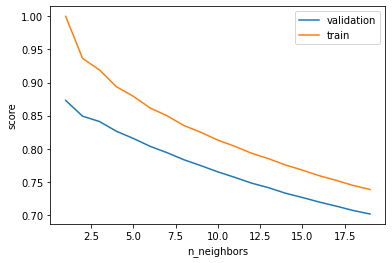

In [57]:
skf_kn = StratifiedKFold(5)
model_cvkn = KNeighborsClassifier()
k = np.arange(1,20)
train_score, val_score = validation_curve(model_cvkn, X_t, y_t, param_name= 'n_neighbors', param_range= k , cv=skf_kn)
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

Nous constatons dans se cas de figure que nous avons notre model d'entrainement se rapproche assez de notre model d'évalauation, se qui nous indique que avons affaire a un bon modèl

#### 2. DecisiontreesClassifier

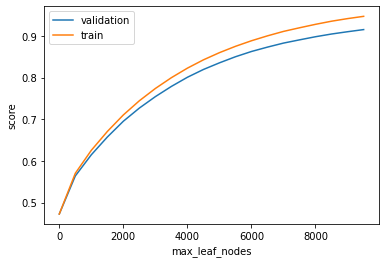

In [62]:
skf_dtc = StratifiedKFold(5)
model_cvdtc = DecisionTreeClassifier()
k = np.arange(5,10000, 500)
train_score, val_score = validation_curve(model_cvdtc, X_t, y_t,param_name= 'max_leaf_nodes', param_range= k,cv=skf_dtc )
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('max_leaf_nodes')
plt.legend()

Nous constatons dans se cas de figure que nous avons notre model d'entrainement se rapproche assez de notre model d'évalauation,
se qui nous indique que avons affaire a un bon modèl. 
Nous pouvons aussi remarquer, qu'apartit de plus de 9000 branche notre model ne fait un tés grand évolution

#### 3. DecisionTreeRegressor

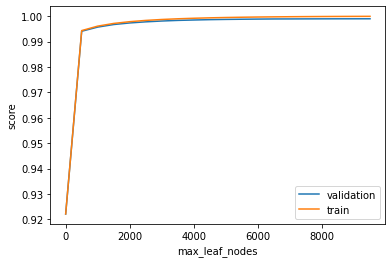

In [65]:
kf_dtr = KFold(5)
model_cvdr = DecisionTreeRegressor()
k = np.arange(5,10000, 500)
train_score, val_score = validation_curve(model_cvdr, X1_t, y1_t, param_name='max_leaf_nodes', param_range= k,cv=kf_dtr )
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('max_leaf_nodes')
plt.legend()

Nous constatons dans se cas de figure que nous avons notre model d'entrainement se rapproche assez de notre model d'évalauation, se qui nous indique que avons affaire a un bon modèl. 
Ceci nous donne le meilleur model possible vu qu'il se rapproach le plus du model d'entrainement. 
Mais nous constaton que la perfomance es pratique stable a parti de plus de 3000 branches.

Nous pouvons tirer la conclusion que la consomation et la production energétique a un impact visible sur le temps d'une région